In [1]:
import pandas as pd 
import numpy as np 
import random
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [60]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)
df.sample(5)

(100, 6)


,col1,col2,col3,col4,col5,target
59,-2.452475,2.420990,-2.400019,2.770716,0.186536,0
2,-1.687375,-1.015313,-1.043758,-1.133307,-1.022997,1
52,-3.308599,-1.717188,-0.699011,-0.582383,-3.190660,1
66,-1.235096,0.756444,-1.999492,-0.346585,-1.245778,1
45,-0.710122,0.256815,-0.687532,-1.116580,-0.879599,0


In [4]:
# function for row sampling 
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling 
def sample_features(df,percent):
    cols=random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df=df[cols]
    new_df['target']=df['target']
    return new_df

In [68]:
# function for combined sampling 
def combined_sampling(df,row_percent,col_percent):
    new_df=sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

#### prediction by row sampling 

In [8]:
df1=sample_rows(df,0.1)

In [9]:
df2=sample_rows(df,0.1)

In [10]:
df3=sample_rows(df,0.1)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [12]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf3.fit(df1.iloc[:,0:5],df1.iloc[:,-1])

DecisionTreeClassifier()

In [13]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[4] <= 0.54\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.625, 0.5, '  False')]

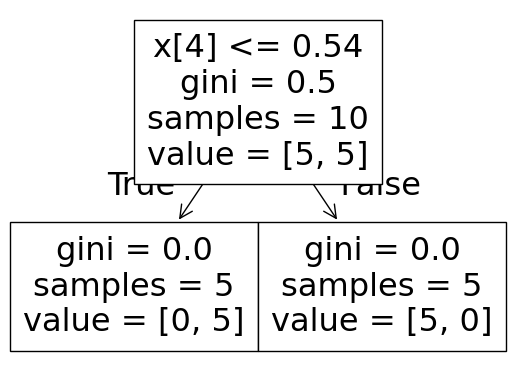

In [14]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[4] <= 0.54\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.625, 0.5, '  False')]

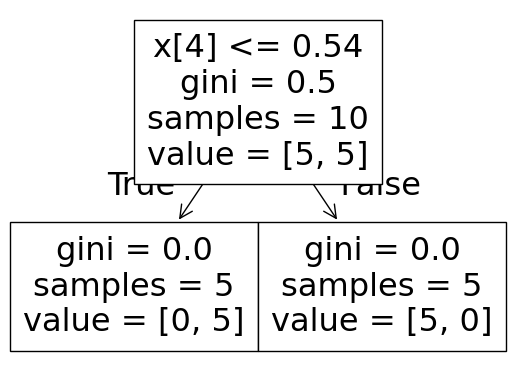

In [15]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[4] <= 0.54\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.625, 0.5, '  False')]

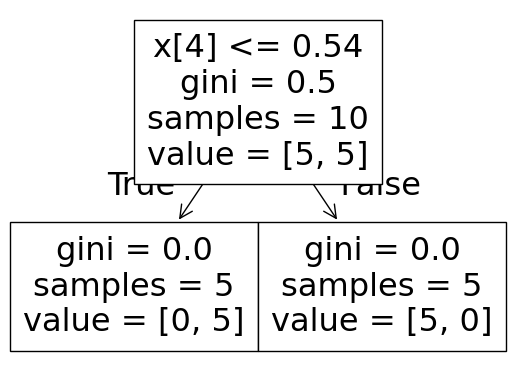

In [16]:
plot_tree(clf3)

In [17]:
# prediction for random value by clf1
clf1.predict(np.array([1.616607,	-0.610650,	-1.244850,	2.187192,	-2.311654]).reshape(1,5))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
# prediction for random value by clf2
clf2.predict(np.array([1.616607,	-0.610650,	-1.244850,	2.187192,	-2.311654]).reshape(1,5))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
# prediction for random value by clf3
clf3.predict(np.array([1.616607,	-0.610650,	-1.244850,	2.187192,	-2.311654]).reshape(1,5))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#### prediction using feature sampling

In [21]:
df1=sample_features(df,0.8)
df2=sample_features(df,0.8)
df3=sample_features(df,0.8)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31424\621319904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31424\621319904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31424\621319904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [22]:
df2

,col4,col1,col5,col2,target
0,-1.328055,-1.058550,-2.165327,-2.976676,1
1,0.150393,-4.450618,-4.266382,-2.793370,1
2,-1.133307,-1.687375,-1.022997,-1.015313,1
3,1.800891,-2.282416,1.451731,0.739149,0
4,-1.272859,0.693185,1.832447,1.873385,1
...,...,...,...,...,...
95,-0.441330,-1.431454,0.148917,0.544481,0
96,-0.259192,-0.057300,0.598275,0.586725,0
97,-1.207732,-2.277496,-1.289347,0.346707,1
98,-0.434856,-4.856573,-1.215897,0.331208,1


In [23]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf3.fit(df1.iloc[:,0:4],df1.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.45454545454545453, 0.9285714285714286, 'x[0] <= -0.558\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.2727272727272727, 0.7857142857142857, 'x[2] <= 0.258\ngini = 0.219\nsamples = 48\nvalue = [6, 42]'),
 Text(0.36363636363636365, 0.8571428571428572, 'True  '),
 Text(0.18181818181818182, 0.6428571428571429, 'x[2] <= -2.471\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.5, 'x[1] <= 0.219\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[0] <= -1.162\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.2727272727272727, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.45454545454545453, 0.21428571428571427, 'x[3] <= -0.463\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.36363636363636365, 0.07142

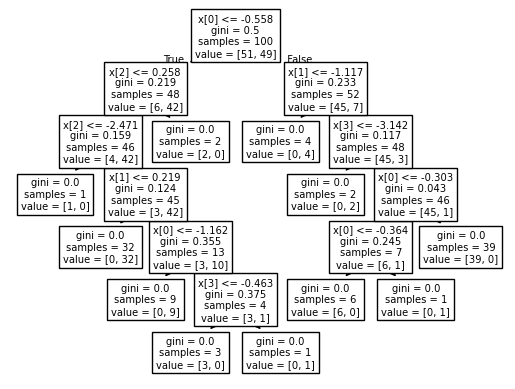

In [24]:
plot_tree(clf1)

[Text(0.45454545454545453, 0.9285714285714286, 'x[0] <= -0.558\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.2727272727272727, 0.7857142857142857, 'x[2] <= 0.258\ngini = 0.219\nsamples = 48\nvalue = [6, 42]'),
 Text(0.36363636363636365, 0.8571428571428572, 'True  '),
 Text(0.18181818181818182, 0.6428571428571429, 'x[2] <= -2.471\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.5, 'x[1] <= 0.219\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[0] <= -1.162\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.2727272727272727, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.45454545454545453, 0.21428571428571427, 'x[3] <= -0.463\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.36363636363636365, 0.07142

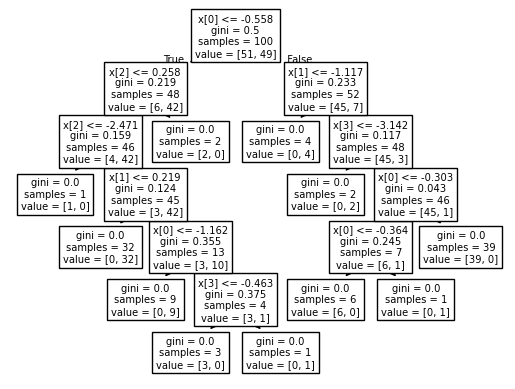

In [25]:
plot_tree(clf2)

[Text(0.45454545454545453, 0.9285714285714286, 'x[0] <= -0.558\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.2727272727272727, 0.7857142857142857, 'x[2] <= 0.258\ngini = 0.219\nsamples = 48\nvalue = [6, 42]'),
 Text(0.36363636363636365, 0.8571428571428572, 'True  '),
 Text(0.18181818181818182, 0.6428571428571429, 'x[2] <= -2.471\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.5, 'x[1] <= 0.219\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[0] <= -1.162\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.2727272727272727, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.45454545454545453, 0.21428571428571427, 'x[3] <= -0.463\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.36363636363636365, 0.07142

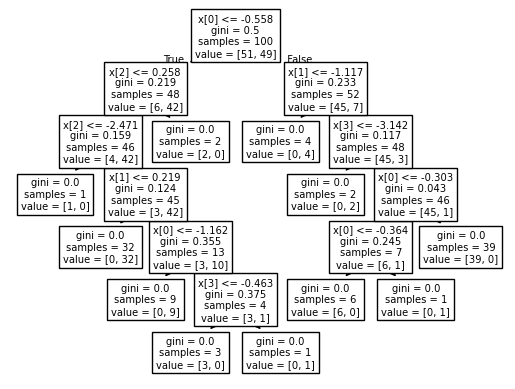

In [26]:
plot_tree(clf3)

In [27]:
# prediction by clf1
clf1.predict(np.array([1.613128,	1.588873,	-0.277080,	1.874469]).reshape(1,4))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [28]:
# prediction by clf2
clf2.predict(np.array([1.613128,	1.588873,	-0.277080,	1.874469]).reshape(1,4))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [29]:
# prediction by clf3
clf3.predict(np.array([1.613128,	1.588873,	-0.277080,	1.874469]).reshape(1,4))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

#### combined sampling 

In [84]:
df1=combined_sampling(df,0.5,0.5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31424\621319904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [86]:
df2=combined_sampling(df,0.5,0.5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31424\621319904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [88]:
df3=combined_sampling(df,0.5,0.5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31424\621319904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [104]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col2', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')
Index(['col3', 'col4', 'target'], dtype='object')


In [106]:
df2

,col2,col5,target
4,1.873385,1.832447,1
0,-2.976676,-2.165327,1
55,3.292264,1.141307,0
46,0.181572,2.448121,1
60,-0.408396,-2.816384,1
77,1.378098,1.337148,0
85,-0.563268,0.793733,0
90,0.469759,-0.338311,1
72,-0.471653,1.270302,0
91,-2.521849,-0.739701,1


In [92]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [96]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df1.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df1.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[0] <= -1.412\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.3, 0.7, 'x[0] <= -1.87\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.4, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[0] <= -2.166\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.7, 0.7, 'x[1] <= 0.507\ngini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(0.6, 0.8, '  False'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.8, 0.5, 'x[1] <= 1.292\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.7, 0.3, 'x[1] <= 1.214\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

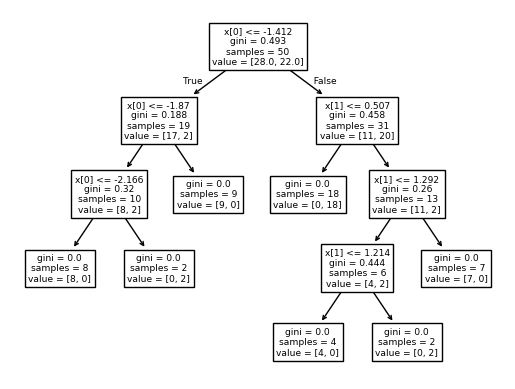

In [98]:
plot_tree(clf1)

[Text(0.359375, 0.95, 'x[1] <= -0.107\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.125, 0.85, 'x[0] <= -2.12\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.2421875, 0.8999999999999999, 'True  '),
 Text(0.0625, 0.75, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.1875, 0.75, 'x[0] <= -1.156\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.125, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.65, 'x[0] <= 0.091\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.1875, 0.55, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3125, 0.55, 'x[1] <= -0.428\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.59375, 0.85, 'x[0] <= -0.977\ngini = 0.438\nsamples = 37\nvalue = [25, 12]'),
 Text(0.4765625, 0.8999999999999999, '  False'),
 Text(0.4375, 0.75, 'x[1] <= 0.845\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(

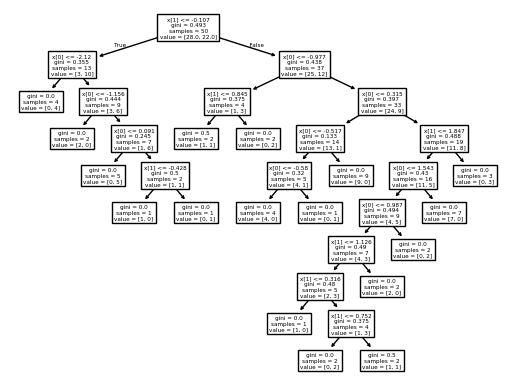

In [100]:
plot_tree(clf2)

[Text(0.3409090909090909, 0.9444444444444444, 'x[1] <= -1.21\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.09090909090909091, 0.8333333333333334, 'x[0] <= -0.221\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.21590909090909088, 0.8888888888888888, 'True  '),
 Text(0.045454545454545456, 0.7222222222222222, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.13636363636363635, 0.7222222222222222, 'x[1] <= -1.704\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.09090909090909091, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18181818181818182, 0.6111111111111112, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5909090909090909, 0.8333333333333334, 'x[1] <= 0.142\ngini = 0.469\nsamples = 40\nvalue = [25, 15]'),
 Text(0.46590909090909094, 0.8888888888888888, '  False'),
 Text(0.36363636363636365, 0.7222222222222222, 'x[1] <= -0.485\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(0.2727272727272727, 0.6111111111111112, 'x[0] <= -1

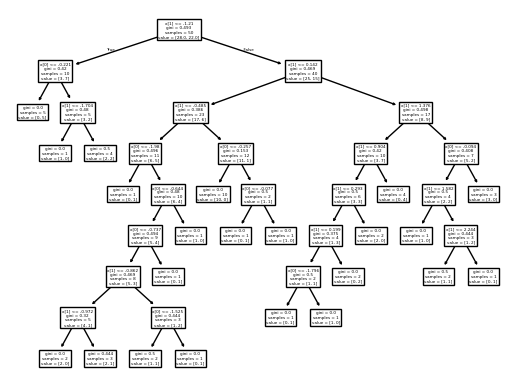

In [102]:
plot_tree(clf3)

In [110]:
# prdiction by clf1
clf1.predict(np.array([0.104517,1.262515]).reshape(1,2))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [112]:
# prdiction by clf2
clf2.predict(np.array([0.104517,1.262515]).reshape(1,2))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [116]:
# prdiction by clf3
clf3.predict(np.array([0.104517,1.262515]).reshape(1,2))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])